Epoch 1/900
300/300 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5499 - loss: 0.6813 - val_accuracy: 0.5987 - val_loss: 0.6577
Epoch 2/900
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5983 - loss: 0.6673 - val_accuracy: 0.6066 - val_loss: 0.6499
Epoch 3/900
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5932 - loss: 0.6566 - val_accuracy: 0.6154 - val_loss: 0.6429
Epoch 4/900
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6064 - loss: 0.6391 - val_accuracy: 0.6241 - val_loss: 0.6344
Epoch 5/900
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6319 - loss: 0.6297 - val_accuracy: 0.6450 - val_loss: 0.6251
Epoch 6/900
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6336 - loss: 0.6257 - val_accuracy: 0.6562 - val_loss: 0.6150
Epoch 7/900
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6391 - loss: 0.6184 - val_accuracy: 0.6600 - val_loss: 0.6075
Epoch 8/900
300/300 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6604 - loss: 0.6101 - val_accu

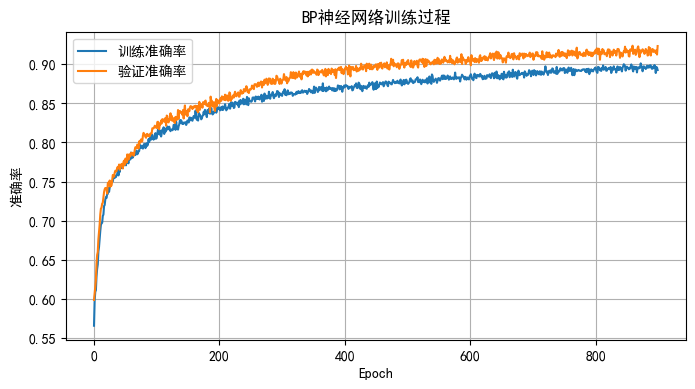

In [3]:
# -*- coding: utf-8 -*-
# EEG Eye State Classification with BP Neural Network

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout  # 加入Input

plt.rcParams['font.sans-serif'] = ['SimHei']        
plt.rcParams['axes.unicode_minus'] = False          

# 1. 数据读取
data = pd.read_csv('EEG_Eye_State_Classification.csv')  

# 2. 特征与标签分离
X = data.iloc[:, :-1].values  # EEG通道特征
y = data.iloc[:, -1].values   # 眼动标签（0/1）

# 3. 数据归一化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. 划分训练集与测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2024, stratify=y)

# 5. BP神经网络结构设计（规范化写法）
model = Sequential([
    Input(shape=(X.shape[1],)),       # 第一层显式声明输入
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')    # 二分类用sigmoid
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 6. 训练
history = model.fit(
    X_train, y_train, 
    epochs=900,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# 7. 测试评估
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

print("测试集准确率：", accuracy_score(y_test, y_pred))
print("\n分类报告：\n", classification_report(y_test, y_pred))
print("混淆矩阵：\n", confusion_matrix(y_test, y_pred))

# 8. 可视化训练过程
plt.figure(figsize=(8,4))
plt.plot(history.history['accuracy'], label='训练准确率')
plt.plot(history.history['val_accuracy'], label='验证准确率')
plt.xlabel('Epoch')
plt.ylabel('准确率')
plt.title('BP神经网络训练过程')
plt.legend()
plt.grid()
plt.show()


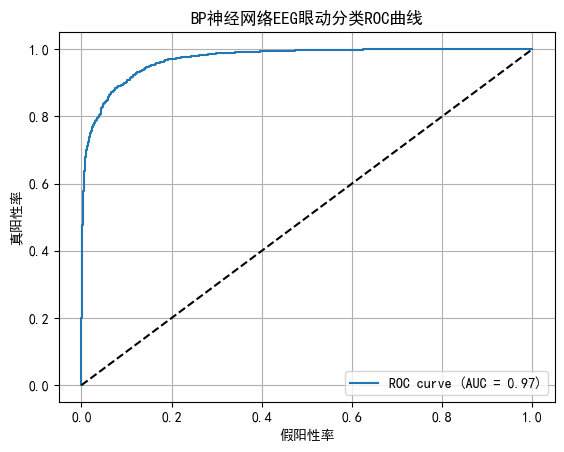

In [5]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('假阳性率')
plt.ylabel('真阳性率')
plt.title('BP神经网络EEG眼动分类ROC曲线')
plt.legend(loc='lower right')
plt.grid()
plt.show()


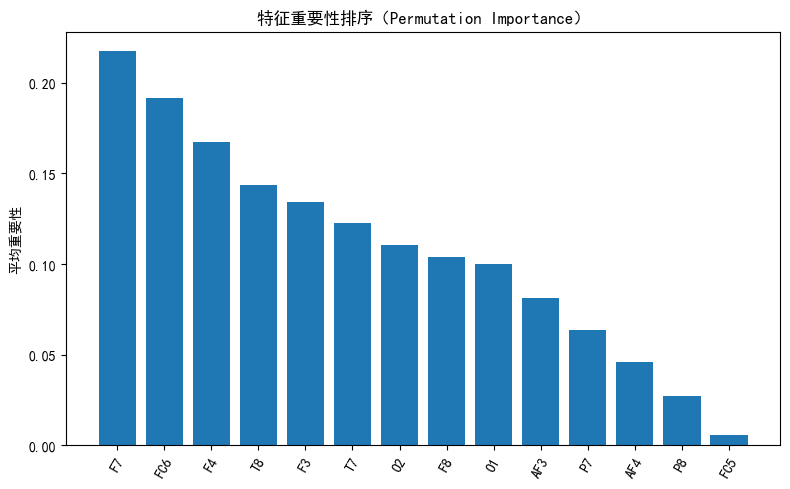

In [6]:
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance

clf = MLPClassifier(hidden_layer_sizes=(32, 16), activation='relu', max_iter=900, random_state=42)
clf.fit(X_train, y_train)

result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy')
importances = result.importances_mean
indices = importances.argsort()[::-1]

plt.figure(figsize=(8,5))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), data.columns[:-1][indices], rotation=60)
plt.title("特征重要性排序（Permutation Importance）")
plt.ylabel("平均重要性")
plt.tight_layout()
plt.show()


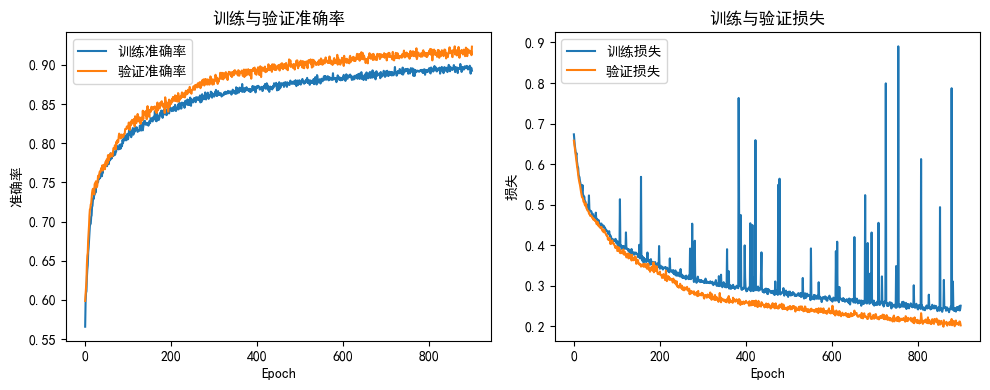

In [7]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='训练准确率')
plt.plot(history.history['val_accuracy'], label='验证准确率')
plt.xlabel('Epoch')
plt.ylabel('准确率')
plt.title('训练与验证准确率')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='训练损失')
plt.plot(history.history['val_loss'], label='验证损失')
plt.xlabel('Epoch')
plt.ylabel('损失')
plt.title('训练与验证损失')
plt.legend()
plt.tight_layout()
plt.show()


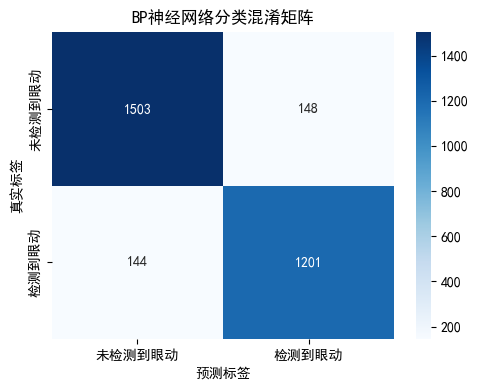

In [8]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 保证中文
plt.rcParams['axes.unicode_minus'] = False

# 计算混淆矩阵
cm = confusion_matrix(y_test, y_pred)

# 绘制混淆矩阵
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['未检测到眼动', '检测到眼动'],
            yticklabels=['未检测到眼动', '检测到眼动'])
plt.xlabel('预测标签')
plt.ylabel('真实标签')
plt.title('BP神经网络分类混淆矩阵')
plt.tight_layout()
plt.show()


数据集形状： (14980, 15)
前5行数据：
       AF3       F7       F3      FC5       T7       P7       O1       O2  \
0  4329.23  4009.23  4289.23  4148.21  4350.26  4586.15  4096.92  4641.03   
1  4324.62  4004.62  4293.85  4148.72  4342.05  4586.67  4097.44  4638.97   
2  4327.69  4006.67  4295.38  4156.41  4336.92  4583.59  4096.92  4630.26   
3  4328.72  4011.79  4296.41  4155.90  4343.59  4582.56  4097.44  4630.77   
4  4326.15  4011.79  4292.31  4151.28  4347.69  4586.67  4095.90  4627.69   

        P8       T8      FC6       F4       F8      AF4  eyeDetection  
0  4222.05  4238.46  4211.28  4280.51  4635.90  4393.85             0  
1  4210.77  4226.67  4207.69  4279.49  4632.82  4384.10             0  
2  4207.69  4222.05  4206.67  4282.05  4628.72  4389.23             0  
3  4217.44  4235.38  4210.77  4287.69  4632.31  4396.41             0  
4  4210.77  4244.10  4212.82  4288.21  4632.82  4398.46             0  

描述性统计：
                count         mean          std        min      25%    

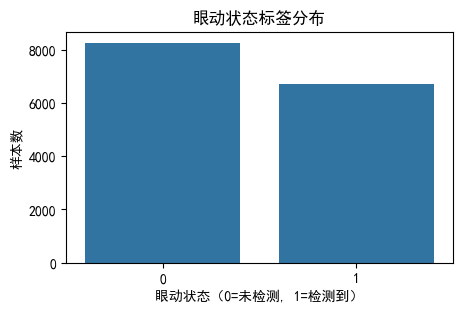

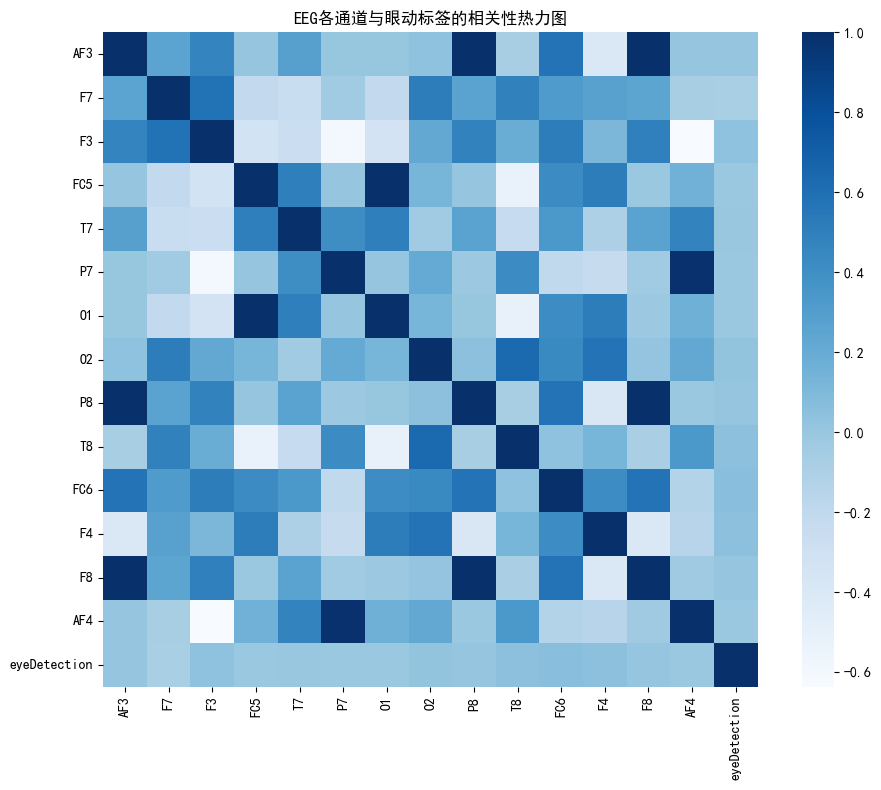

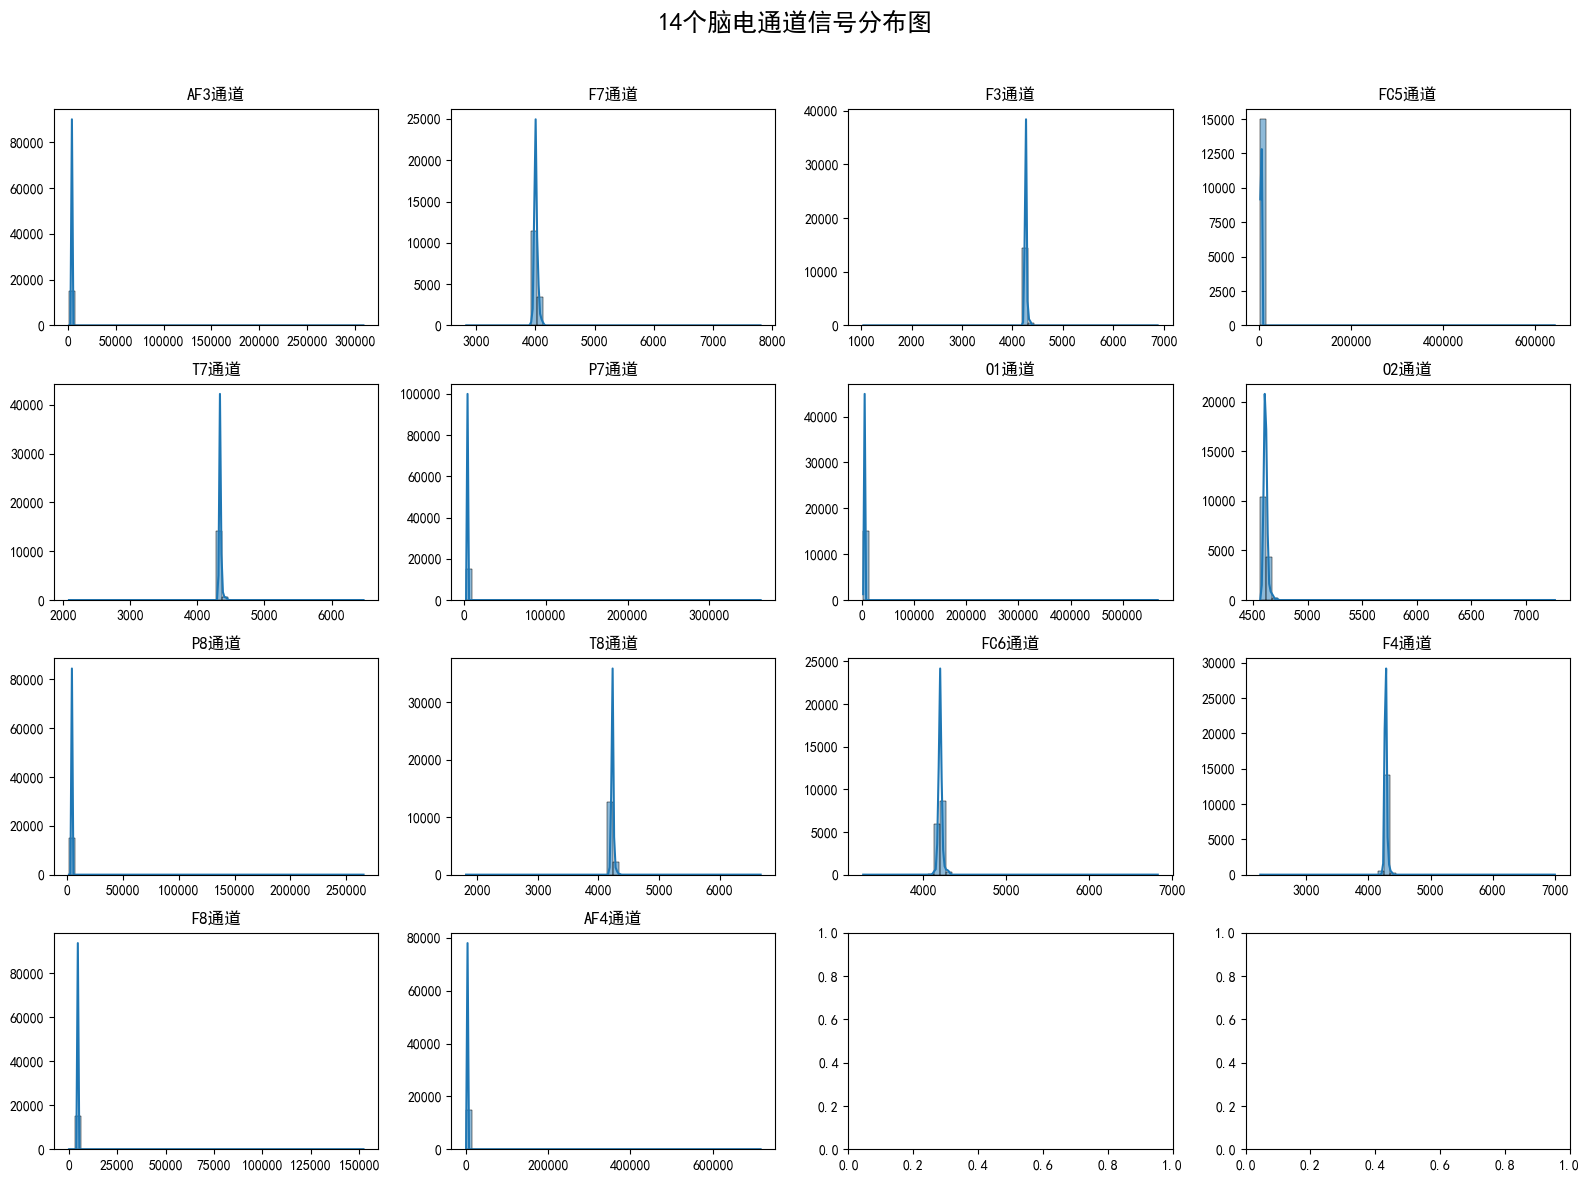

In [12]:
# 1. 数据读取
data = pd.read_csv('EEG_Eye_State_Classification.csv')  


print("数据集形状：", data.shape)
print("前5行数据：")
print(data.head())

print("\n描述性统计：")
print(data.describe().T)

# 标签分布可视化
import seaborn as sns
plt.figure(figsize=(5,3))
sns.countplot(x='eyeDetection', data=data)
plt.xlabel('眼动状态（0=未检测, 1=检测到）')
plt.ylabel('样本数')
plt.title('眼动状态标签分布')
plt.show()

# 相关性热力图
plt.figure(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr, cmap='Blues', annot=False, square=True, 
            xticklabels=corr.columns, yticklabels=corr.columns)
plt.title('EEG各通道与眼动标签的相关性热力图')
plt.tight_layout()
plt.show()

eeg_channels = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2',
                'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4']

fig, axes = plt.subplots(4, 4, figsize=(16,12))
axes = axes.flatten()

for i, ch in enumerate(eeg_channels):
    sns.histplot(data[ch], bins=50, kde=True, ax=axes[i])
    axes[i].set_title(f'{ch}通道')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')
plt.suptitle('14个脑电通道信号分布图', fontsize=18)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


